<a href="https://colab.research.google.com/github/mchsidiq12/H8_06/blob/main/PYTN_KampusMerdeka_fp3_Adrian_Dwi_Adinata_Mohammad_Sidik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Belajar Mengembangkan Model Database dengan Python untuk Menjadi Analis Database / Final Projects 3 (Ensemble)**

Objektif

Final Project 3 ini dibuat guna mengevaluasi konsep Ensemble sebagai berikut:

● Mampu memahami konsep Classification dengan Ensemble Model

● Mampu mempersiapkan data untuk digunakan dalam Ensemble Model

● Mampu mengimplementasikan Ensemble Model untuk membuat prediksi


# **A. Perkenalan**


Bab pengenalan harus diisi dengan latar belakang memilih kasus, data yang digunakan (jumlah data, kelas, sumber), dan objective yang ingin dicapai.

Project ini membahas tentang penerapan Supervised Machine Learning, yaitu metode Classification. Project ini berlatar belakangkan Penyakit kardiovaskular (CVD) yang merupakan penyebab kematian nomor 1 secara global. Gagal jantung adalah peristiwa umum yang disebabkan oleh CVD. Dataset ini berisi 12 fitur yang dapat digunakan untuk memprediksi kematian akibat gagal jantung.

Data yang kami gunakan dalam project ini adalah data dokumentasi kondisi pasien penderita penyakit Kardiovaskular. Dataset ini terdiri dari 299 baris dan 13 kolom. Kolom DEATH_EVENT akan menjadi target untuk prediksi ini. Jadi, tujuan dari project ini adalah berdasarkan fitur yang dimiliki dalam data, dapat diprediksi apakah seorang pasien tersebut diperkirakan akan menerima risiko kematian akibat gagal jantung/penyakit Kardiovaskular atau tidak.

Selaian itu, tujuan dari project ini adalah membangun model ensemble, yaitu mencari model prediksi klasifikasi terbaik dari beberapa algoritma model yang digunakan untuk prediksi. 

Algoritma model klasifikasi yang digunakan adalah: 

- Logistic Regression, 
- K-Nearest Neighbors, 
- Support Vector Machine (SVM), 
- Decision Tree, dan 
- Naive Bayes. 

Attribute Information:
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi
di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

# **B. Import Pustaka Yang Dibutuhkan**

Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.


Pertama, library yang dibutuhkan di-import.
Bagian ini berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
from google.colab import drive #untuk mengakses drive
from dataclasses import dataclass
import pandas as pd #untuk manipulasi data
import numpy as np #untuk komputasi numerik
import matplotlib.pyplot as plt #untuk visualisasi
import seaborn as sns #untuk visualisasi
import statistics
import plotly.express as px #untuk visualiasi

from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split #untuk pemisahan data latih dan uji
from sklearn.linear_model import LogisticRegression #untuk menggunakan algoritma logistic regression
from sklearn.neighbors import KNeighborsClassifier #untuk menggunakan algoritma KNN
from sklearn.svm import SVC #untuk menggunakan algoritma SVM
from sklearn.tree import DecisionTreeClassifier #untuk menggunakan algoritma Decision Tree
from sklearn.ensemble import RandomForestClassifier #untuk menggunakan algoritma Random Forest
from sklearn.naive_bayes import GaussianNB #untuk menggunakan algoritma Naive Bayes
from scipy import stats


from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score

#Adaboost
from mlxtend.plotting import plot_decision_regions
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier

# **C. Data Loading**

Bagian ini berisi proses data loading yang kemudian dilanjutkan dengan eksplorasi data secara sederhana.

Mengakses Google Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


Mengambil dataset dan menyimpan kedalam variabel df, kemudian mencetak 5 data paling atas dan 5 data paling bawah

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_failure_clinical_records_dataset.csv')
display(df)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Menampilkan nama-nama kolom pada dataframe

In [4]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

Menampilkan informasi detail tentang dataframe.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Mengecek tipe data untuk tiap kolom di dataframe

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Menampilkan deskriptif statistik data numerik

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [8]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

Menampilkan nilai unik dari setiap kolom pada dataframe.

In [9]:
df.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

Mengetahui dimensi (baris dan kolom) data

In [10]:
print('Jumlah Baris:', df.shape[0])
print('Jumlah Kolom:', df.shape[1])

Jumlah Baris: 299
Jumlah Kolom: 13


Mengetahui jumlah seluruh elemen yang ada di dataframe

In [11]:
df.size

3887

# **D. Data Cleaning**

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum dilakukan explorasi data lebih lanjut. Proses cleaning dapat berupa memberi nama baru untuk setiap kolom, mengisi missing values,
menghapus kolom yang tidak dipakai, dan lain sebagainya.


Menampilkan jumlah missing value

In [12]:
df.isnull().sum().sum()

0

Memeriksa apakah terdapat duplikasi dalam data

In [13]:
df.duplicated().sum()

0

Berdasarkan keterangan diatas, terlihat bahwa tidak ada missing values atau data yang hilang dalam kumpulan data. Serta tidak terdapat duplikasi pada keseluruhan data.

Mengubah nama kolom anaemia menjadi anemia dan DEATH_EVENT menjadi death agar lebih sesuai dan mudah dipahami

In [14]:
df.rename(columns={'anaemia':'anemia', 'DEATH_EVENT':'death'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anemia                    299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death                     299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


# **E. Explorasi Data**

Bagian ini berisi explorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

Memeriksa Korelasi antar fitur

In [15]:
df.corr()

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


Visualisasi Korelasi antar fitur

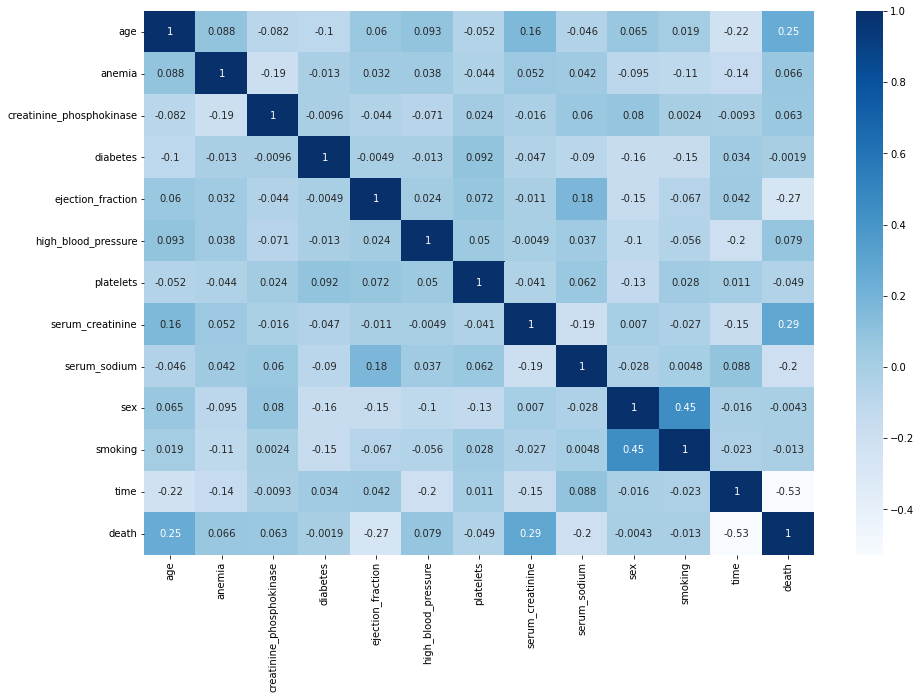

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='Blues')

Seperti dapat dilihat dari visualisasi di atas, semua fitur atau kolom dalam data memiliki korelasi atau hubungan yang rendah dengan kolom target. Kolom age atau umur memiliki koefisien korelasi positif yang cenderung rendah sebesar 0,25. Artinya, semakin tua pasien, semakin tinggi risiko kematian akibat penyakit jantung. Kolom ejection_fraction dan serum_sodium memiliki koefisien korelasi negatif, masing-masing cenderung rendah pada -0,27 dan -0,2 untuk kolom target. Ini berarti bahwa semakin rendah persentase darah yang meninggalkan jantung dan kadar serum sodium, semakin tinggi risiko kematian akibat penyakit jantung. Juga, koefisien korelasi positif antara kolom serum_creatinne dan kolom target cenderung rendah, 0,29. Artinya semakin tinggi kadar kreatinin serum dalam tubuh pasien, maka semakin tinggi pula risiko kematian akibat penyakit jantung. Kolom time memiliki koefisien korelasi negatif cenderung tinggi yaitu sebesar -0.53. Ini dapat diartikan bahwa semakin banyak hari untuk follow-up kondisi pasien, maka risiko kematian akan semakin rendah. Untuk kolom atau fitur lain seperti anemia, creatinine_phosphokinase, diabetes, high_blood_pressure, platelets, sex, dan smoking tidak memiliki korelasi yang signifikan dengan kolom target.

Visualisasi Distribusi Data Menggunakan Histogram

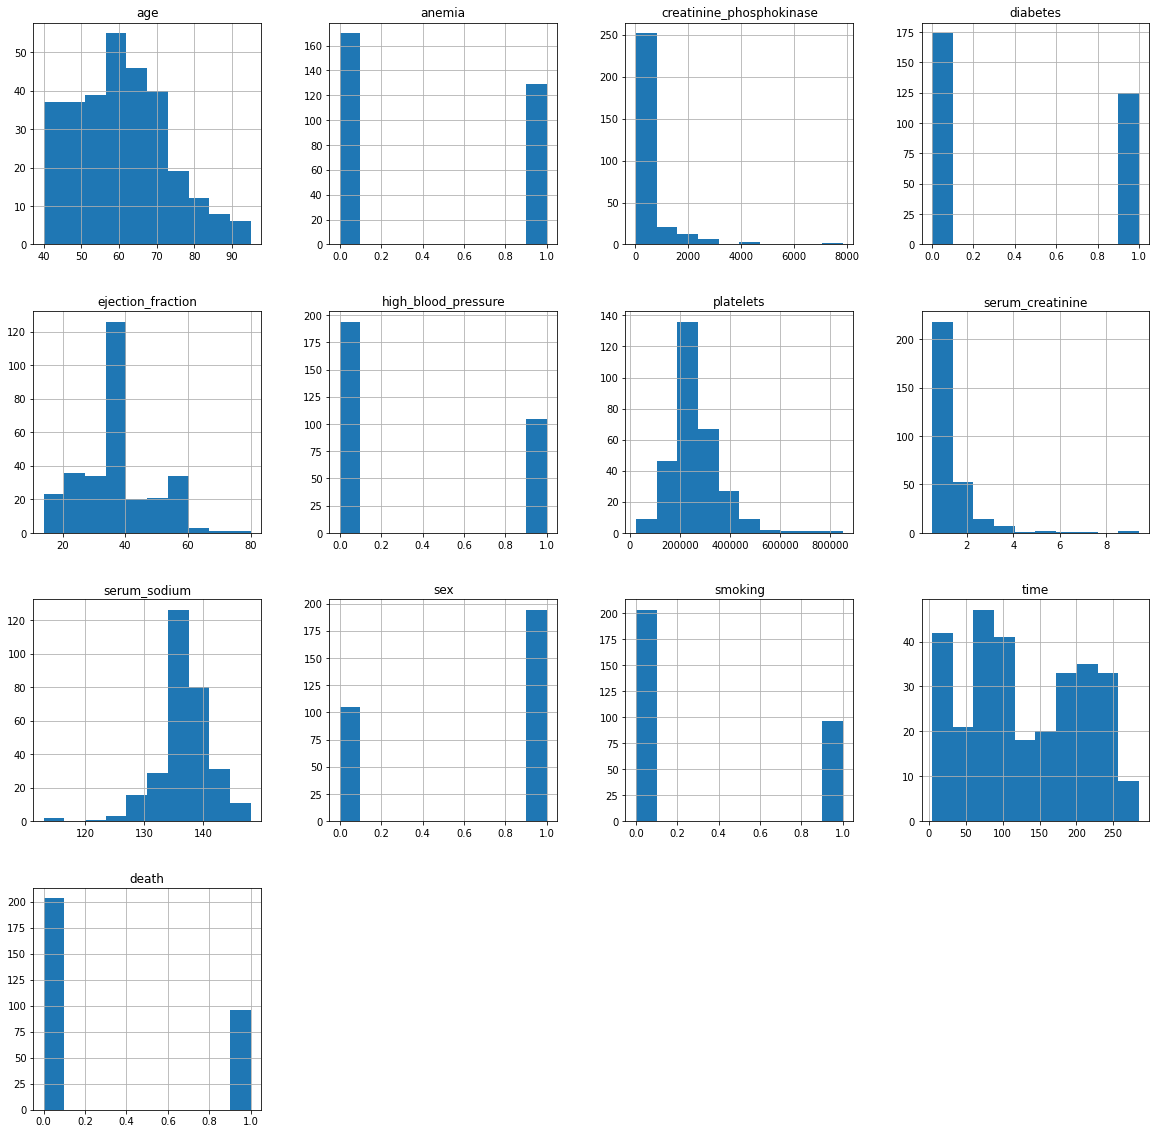

In [17]:
df.hist(figsize=(20,20))
plt.show()

Dari grafik di atas dapat dilihat secara grafik bahwa hampir setiap variabel atau fitur tidak memiliki distribusi atau distribusi normal. Selain itu, menurut peta persebaran, terlihat bahwa frekuensi usia pasien yang tercatat dalam data paling tinggi, sekitar 55-65 tahun.

Uji kemiringan menggunakan skewness

In [18]:
df.skew()

age                         0.423062
anemia                      0.278261
creatinine_phosphokinase    4.463110
diabetes                    0.333929
ejection_fraction           0.555383
high_blood_pressure         0.626732
platelets                   1.462321
serum_creatinine            4.455996
serum_sodium               -1.048136
sex                        -0.626732
smoking                     0.770349
time                        0.127803
death                       0.770349
dtype: float64

Dari hasil di atas dapat dilihat bahwa kolom creatinine_phosphokinase dan serum_creatinine memiliki nilai skewness tertinggi. Ini berarti modus dan median kedua kolom berada di bawah mean. Juga, kolom serum_sodium dan sex memiliki nilai skewness negatif, yang berarti bahwa modus dan median lebih tinggi dari rata-rata.

Uji normalitas data

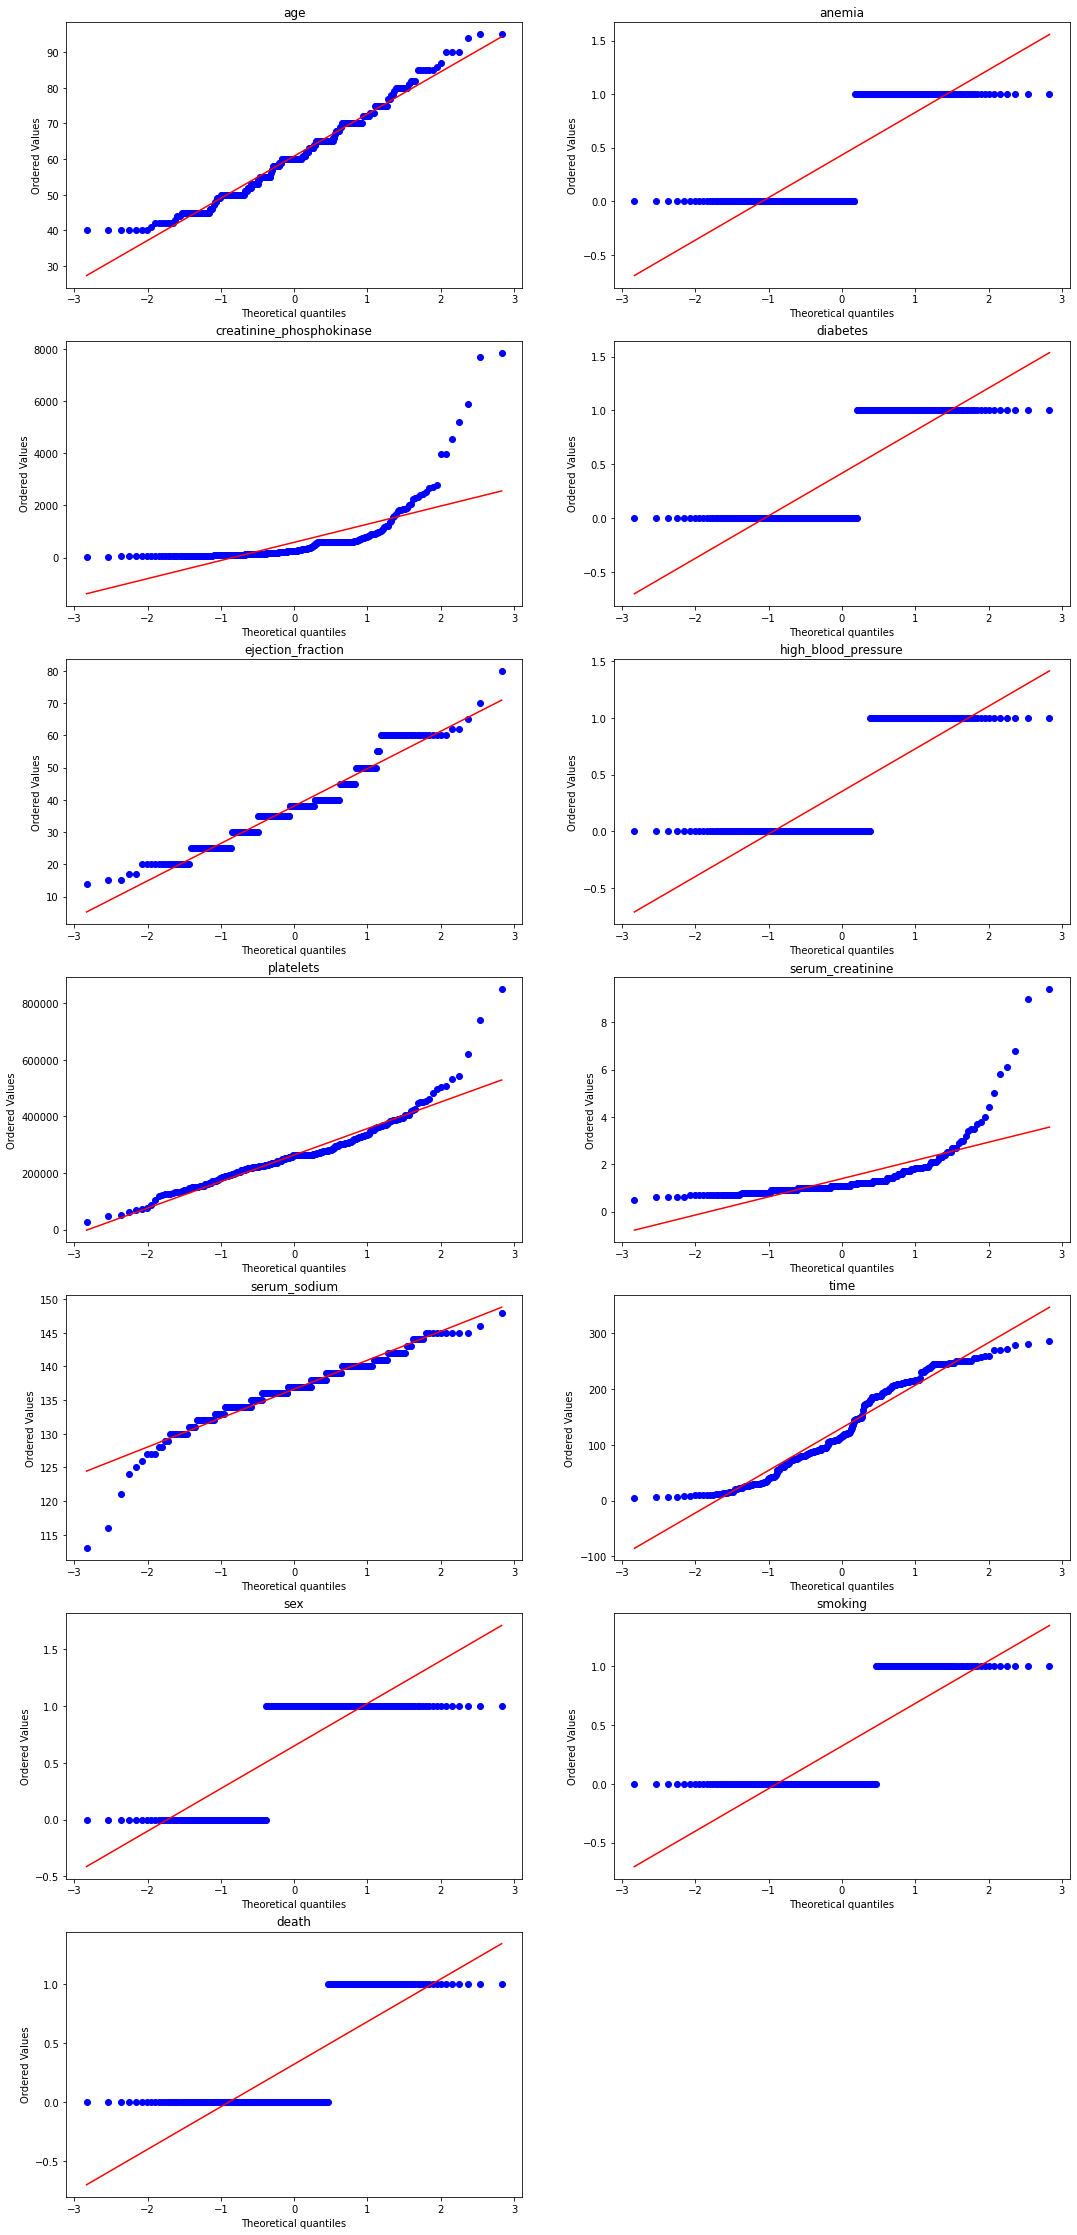

In [19]:
# Variable names
columns = ["age", "anemia", "creatinine_phosphokinase", "diabetes", "ejection_fraction", "high_blood_pressure", "platelets", "serum_creatinine", "serum_sodium", "time", "sex", "smoking", "death"]

# Create the plot
plt.figure(figsize=(18, 40))

for i in range(1, 14):
    plt.subplot(7, 2, i)
    stats.probplot(df[columns[i-1]], dist="norm", plot=plt)
    plt.title(columns[i-1])

Dari gambar di atas, terlihat bahwa secara grafis, setiap kolom atau fitur memiliki titik yang terdistribusi di antara garis merah atau biasa disebut normal. Kolom kategoris untuk anemia, diabetes, hipertensi, jenis kelamin, merokok, dan kolom target

Melihat nilai unik pada variabel target.

In [20]:
df["death"].unique()

array([1, 0])

Terlihat bahwa pada variabel target terdapat 2 unik yaitu 1 dan 0. Dimana 1 merupakan jumlah orang yang memliki risiko kematian akibat penyakit jantung dan 0 merupakan jumlah orang yang tidak memiliki risiko kematian akibat penyakit jantung.

Jumlah masing-masing nilai unik pada kolom target

Memeriksa distribusi target

In [21]:
num_heart_failure = len(df)
num_true = len(df.loc[df["death"] == 1])
num_false = len(df.loc[df["death"] == 0])
print("Jumlah pasien yang memiliki risiko kematian akibat penyakit jantung: {0} ({1:2.2f}%)".format(num_true, (num_true/num_heart_failure)*100))
print("Jumlah pasien yang tidak memiliki risiko kematian akibat penyakit jantung: {0} ({1:2.2f}%)".format(num_false, (num_false/num_heart_failure)*100))

df_death = df.groupby(by=["death"]).size().reset_index(name="counts")
px.bar(data_frame=df_death, x="death", y="counts", color="death", barmode="group", text_auto=True)

Jumlah pasien yang memiliki risiko kematian akibat penyakit jantung: 96 (32.11%)
Jumlah pasien yang tidak memiliki risiko kematian akibat penyakit jantung: 203 (67.89%)


Distribusi umur pasien dengan risiko kematian

In [22]:
mean_age = df["age"].mean()
print("Rata-rata usia pasien adalah {:.2f}".format(mean_age))

df_age_death = df.groupby(by=["age","death"]).size().reset_index(name="counts")
px.bar(data_frame=df_age_death, x="age", y="counts", color="death", barmode="group", text_auto=True)

Rata-rata usia pasien adalah 60.83


Seperti yang terlihat dari grafik di atas, usia 60 tahun merupakan usia dengan risiko kematian tertinggi akibat penyakit jantung. Selain itu, dapat dilihat bahwa usia pasien cenderung mempengaruhi risiko kematian, karena risiko kematian lebih rendah pada mereka yang berusia di bawah 50 tahun dan lebih tinggi pada mereka yang berusia di atas 50 tahun.

In [23]:
age_above_50_not_died = df['death'][df.age >=50][df.death == 0]
age_above_50_died = df['death'][df.age >= 50][df.death == 1]

len_died = len(age_above_50_died)
len_not_died = len(age_above_50_not_died)

arr1 = np.array([len_died, len_not_died])
labels =['DIED','NOT DIED']

print(f'Jumlah pasien berumur di atas 50 tahun yang memiliki risiko kematian :- {len_died}')
print(f'Jumlah pasien berumur di atas 50 tahun yang tidak memiliki risiko kematian:- {len_not_died}')

Jumlah pasien berumur di atas 50 tahun yang memiliki risiko kematian :- 85
Jumlah pasien berumur di atas 50 tahun yang tidak memiliki risiko kematian:- 167


Mendeklarasikan variable labels

In [24]:
labels =['NOT DIED','DIED']

Mendeklarasikan variable sizes

In [25]:
sizes=df.groupby(['death']).size()

Mendeklarasikan warna yang akan digunakan

In [26]:
colors=['cornflowerblue','lightskyblue']

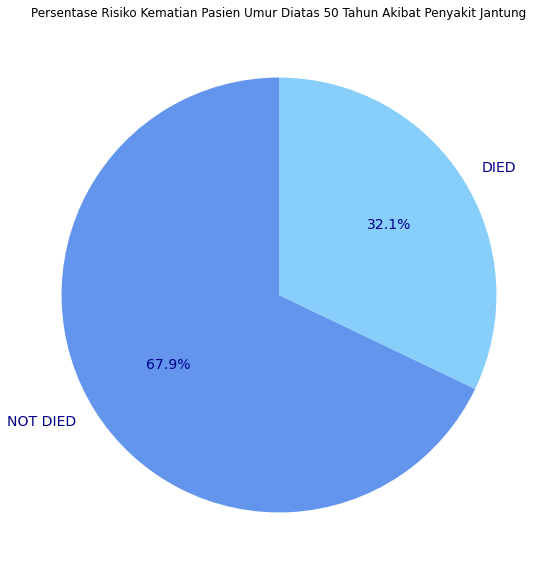

In [27]:
plt.figure(figsize=(20,10)) # Mengatur ukuran visualisasi
ax = plt.axes()
ax.set_facecolor("lightblue") # Memberi warna background
plt.title('Persentase Risiko Kematian Pasien Umur Diatas 50 Tahun Akibat Penyakit Jantung')
ab=plt.pie(sizes, labels=labels, colors=colors, startangle=90,autopct='%1.1f%%', textprops={'fontsize': 14,'color':'darkblue'})
plt.show()

Seperti juga dapat dilihat dari diagram lingkaran di atas, rasio pasien berusia di atas 50 tahun yang berisiko meninggal akibat penyakit kardiovaskular cukup tinggi yakni 32.1%

**Distribusi jenis kelamin pasien dengan risiko kematian**

In [28]:
female = df['death'][df.sex == 0]
male = df['death'][df.sex == 1]

len_f = len(female)
len_m = len(male)

print(f'Jumlah pasien berjenis kelamin wanita: {len_f}')
print(f'Jumlah pasien berjenis kelamin pria: {len_m}')

df_sex_death = df.groupby(by=["sex","death"]).size().reset_index(name="counts")
px.bar(data_frame=df_sex_death, x="sex", y="counts", color="death", barmode="group", text_auto=True)

Jumlah pasien berjenis kelamin wanita: 105
Jumlah pasien berjenis kelamin pria: 194


Seperti dapat dilihat dari grafik di atas, lebih banyak pria (1) daripada wanita (0) yang berisiko meninggal akibat penyakit jantung.

**Distribusi kolom anemia, diabetes, high_blood_pressure, smoking, dan time berdasarkan risiko kematian**

In [29]:
df_anemia_death = df.groupby(by=["anemia","death"]).size().reset_index(name="counts")
px.bar(data_frame=df_anemia_death, x="anemia", y="counts", color="death", barmode="group", text_auto=True)

In [30]:
df_diabetes_death = df.groupby(by=["diabetes","death"]).size().reset_index(name="counts")
px.bar(data_frame=df_diabetes_death, x="diabetes", y="counts", color="death", barmode="group", text_auto=True)

In [31]:
df_hbp_death = df.groupby(by=["high_blood_pressure","death"]).size().reset_index(name="counts")
px.bar(data_frame=df_hbp_death, x="high_blood_pressure", y="counts", color="death", barmode="group", text_auto=True)

In [32]:
df_smoke_death = df.groupby(by=["smoking","death"]).size().reset_index(name="counts")
px.bar(data_frame=df_smoke_death, x="smoking", y="counts", color="death", barmode="group", text_auto=True)

In [33]:
df_time_death = df.groupby(by=["time","death"]).size().reset_index(name="counts")
px.bar(data_frame=df_time_death, x="time", y="counts", color="death", barmode="group", text_auto=True)

Berdasarkan grafik di atas, setiap kolom tidak menunjukkan pengaruh yang signifikan terhadap risiko kematian akibat penyakit jantung, baik itu anemia, diabetes, tekanan darah tinggi, maupun merokok. Namun, untuk kolom time atau waktu follow-up pasien menunjukkan bahwa semakin sedikit waktu follow-up, maka risiko kematian akibat penyakit jantung semakin tinggi dikarenakan kurangnya kontrol kondisi kesehatan atau kondisi vital pasien.

# **F. Data Preprocessing**

Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.


In [34]:
data = df.copy()

Memisahkan / memecah data

In [35]:
age = data["age"]
anemia = data["anemia"]
creatinine_phosphokinase = data["creatinine_phosphokinase"]
diabetes = data["diabetes"]
ejection_fraction = data["ejection_fraction"]
high_blood_pressure = data["high_blood_pressure"]
platelets = data["platelets"]
serum_creatinine = data["serum_creatinine"]
serum_sodium = data["serum_sodium"]
sex = data["sex"]
smoking = data["smoking"]
time = data["time"]
target = data["death"]

Visualisasi nilai statistik masing-masing kolom menggunakan boxplot.

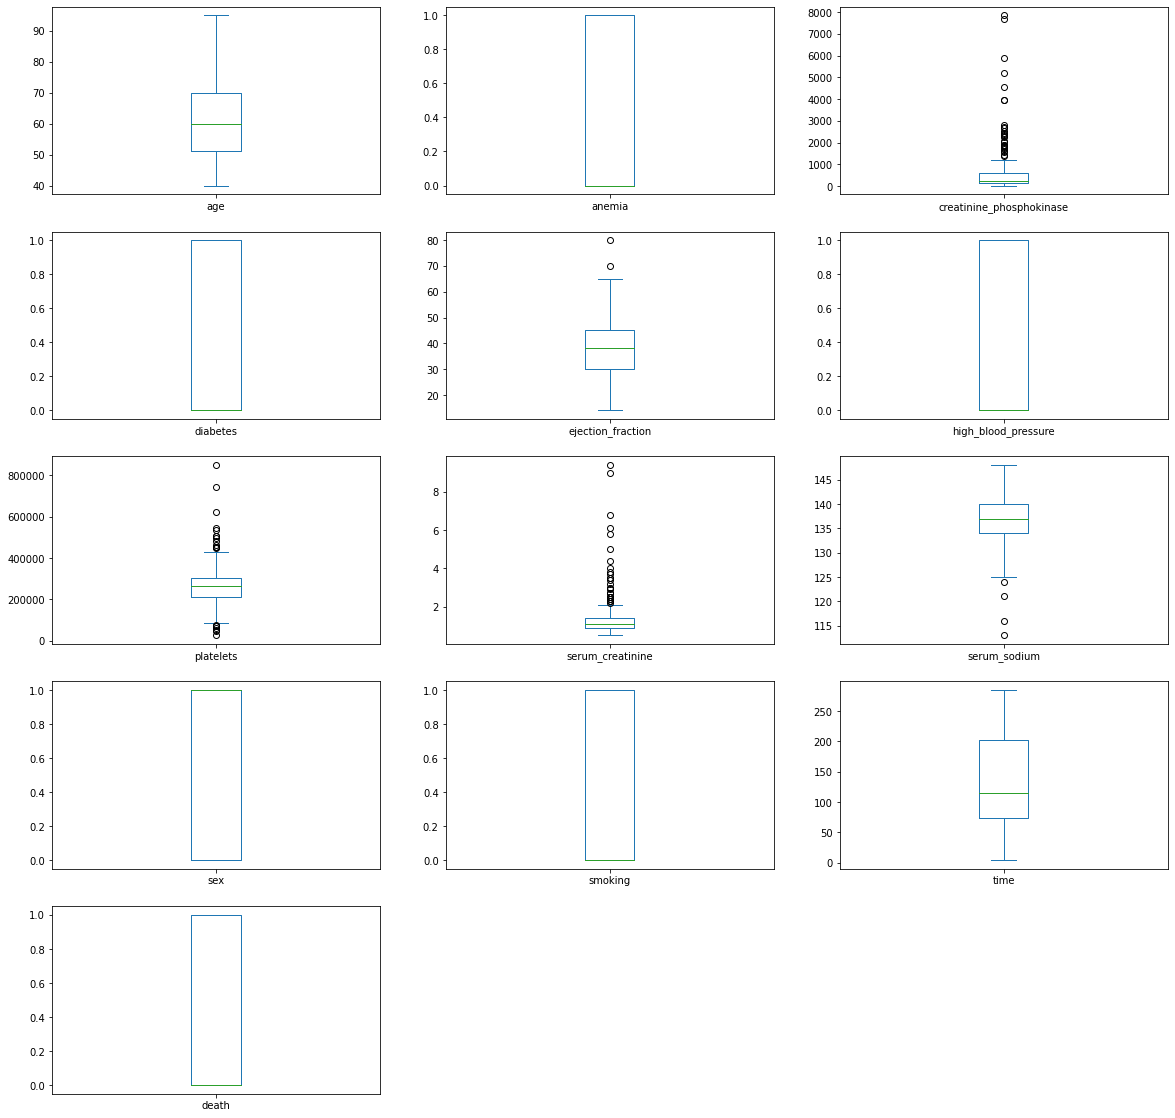

In [36]:
fig = plt.figure(figsize=(20,20))

ax0 = fig.add_subplot(5,3,1)
ax1 = fig.add_subplot(5,3,2)
ax2 = fig.add_subplot(5,3,3)
ax3 = fig.add_subplot(5,3,4)
ax4 = fig.add_subplot(5,3,5)
ax5 = fig.add_subplot(5,3,6)
ax6 = fig.add_subplot(5,3,7)
ax7 = fig.add_subplot(5,3,8)
ax8 = fig.add_subplot(5,3,9)
ax9 = fig.add_subplot(5,3,10)
ax10 = fig.add_subplot(5,3,11)
ax11 = fig.add_subplot(5,3,12)
ax12 = fig.add_subplot(5,3,13)

age.plot(kind="box", ax=ax0)
anemia.plot(kind="box", ax=ax1)
creatinine_phosphokinase.plot(kind="box", ax=ax2)
diabetes.plot(kind="box", ax=ax3)
ejection_fraction.plot(kind="box", ax=ax4)
high_blood_pressure.plot(kind="box", ax=ax5)
platelets.plot(kind="box", ax=ax6)
serum_creatinine.plot(kind="box", ax=ax7)
serum_sodium.plot(kind="box", ax=ax8)
sex.plot(kind="box", ax=ax9)
smoking.plot(kind="box", ax=ax10)
time.plot(kind="box", ax=ax11)
target.plot(kind="box", ax=ax12)

plt.show()

**Standarisasi data**

Standardisasi adalah proses mengubah data sedemikian rupa sehingga mean tiap variabel menjadi sama dengan nol, dan standard deviation tiap variabel adalah satu. Dengan begitu, akan didapatkan skala yang sama untuk semua variabel. Standarisasi juga dilakukan karena banyaknya outlier atau pecilan pada data.

In [37]:
scaler = StandardScaler()
scaler.fit(data.drop('death',axis = 1))
scaled_features = scaler.transform(data.drop('death',axis = 1))
df_final = pd.DataFrame(scaled_features,columns = df.columns[:-1])
display(df_final)

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
0,1.192945,-0.871105,0.000166,-0.847579,-1.530560,1.359272,1.681648e-02,0.490057,-1.504036,0.735688,-0.687682,-1.629502
1,-0.491279,-0.871105,7.514640,-0.847579,-0.007077,-0.735688,7.535660e-09,-0.284552,-0.141976,0.735688,-0.687682,-1.603691
2,0.350833,-0.871105,-0.449939,-0.847579,-1.530560,-0.735688,-1.038073e+00,-0.090900,-1.731046,0.735688,1.454161,-1.590785
3,-0.912335,1.147968,-0.486071,-0.847579,-1.530560,-0.735688,-5.464741e-01,0.490057,0.085034,0.735688,-0.687682,-1.590785
4,0.350833,1.147968,-0.435486,1.179830,-1.530560,-0.735688,6.517986e-01,1.264666,-4.682176,-1.359272,-0.687682,-1.577879
...,...,...,...,...,...,...,...,...,...,...,...,...
294,0.098199,-0.871105,-0.537688,1.179830,-0.007077,1.359272,-1.109765e+00,-0.284552,1.447094,0.735688,1.454161,1.803451
295,-0.491279,-0.871105,1.278215,-0.847579,-0.007077,-0.735688,6.802472e-02,-0.187726,0.539054,-1.359272,-0.687682,1.816357
296,-1.333392,-0.871105,1.525979,1.179830,1.854958,-0.735688,4.902082e+00,-0.575031,0.312044,-1.359272,-0.687682,1.906697
297,-1.333392,-0.871105,1.890398,-0.847579,-0.007077,-0.735688,-1.263389e+00,0.005926,0.766064,0.735688,1.454161,1.932509


Dataset Split dengan rasio 80% data training dan 20% data testing

In [38]:
X = df_final
y = data["death"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
print("Training set sebesar {0:0.2f}%".format(len(X_train)/len(df.index)*100))
print("Test set sebesar {0:0.2f}%".format(len(X_test)/len(df.index)*100))

Training set sebesar 79.93%
Test set sebesar 20.07%


In [40]:
print('Jumlah training set:', len(X_train))
print('Jumlah testing set:', len(X_test))

Jumlah training set: 239
Jumlah testing set: 60


In [41]:
print("Training True: {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)*100.0)))
print("Training False: {0} ({1:2.2f}%)\n".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)*100.0)))

print("Testing True: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)*100.0)))
print("Testing False: {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)*100.0)))

Training True: 73 (30.54%)
Training False: 166 (69.46%)

Testing True: 23 (38.33%)
Testing False: 37 (61.67%)


# **G. Pendefinisian Model**

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model. Akan lebih bagus jika didahului dengan penjelasan mengapa memilih
arsitektur atau jenis model tertentu, alasan memilih nilai hyperparameter, dan hal lain yang berkaitan.


- Logistic Regression

In [55]:
model_lr = LogisticRegression()
model_lr

LogisticRegression()

- K-Nearest Neighbors

In [56]:
model_knn = KNeighborsClassifier()
model_knn

KNeighborsClassifier()

- Support Vector Machine (SVM)

In [57]:
model_svm = SVC()
model_svm

SVC()

- Decision Tree

In [58]:
model_dt = DecisionTreeClassifier()
model_dt

DecisionTreeClassifier()

- Random Forest

In [59]:
model_rf = RandomForestClassifier(n_estimators=200)
model_rf

RandomForestClassifier(n_estimators=200)

- Naive Bayes

In [60]:
model_nb = GaussianNB()
model_nb

GaussianNB()

# **H. Pelatihan Model**

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan.

- Logistic Regression

In [61]:
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

- K-Nearest Neighbors

In [62]:
model_knn.fit(X_train, y_train)
y_pred_knn = model_knn.predict(X_test)

- Support Vector Machine

In [63]:
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

- Decision Tree

In [64]:
model_dt.fit(X_train, y_train)
y_pred_dt = model_dt.predict(X_test)

- Random Forest

In [65]:
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

- Naive Bayes

In [66]:
model_nb.fit(X_train, y_train)
y_pred_nb = model_nb.predict(X_test)

# **I. Evaluasi Model**

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan
model. Jika memilih untuk melakukan model deployment, lanjut ke poin dibawah. Jika tidak, lanjut ke poin 5 dan 6.


- Logistic Regression

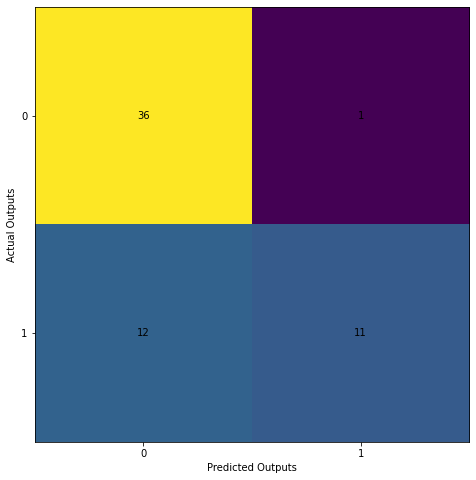

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.97      0.85        37
           1       0.92      0.48      0.63        23

    accuracy                           0.78        60
   macro avg       0.83      0.73      0.74        60
weighted avg       0.81      0.78      0.76        60

Accuracy Score:- 0.7833333333333333
Precision Score:- 0.9166666666666666
Recall Score:- 0.4782608695652174


In [67]:
cm = confusion_matrix(y_test, y_pred_lr)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='black')
ax.set_ylabel('Actual Outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='black')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_lr)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_lr)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_lr)}')

- K-Nearest Neighbors

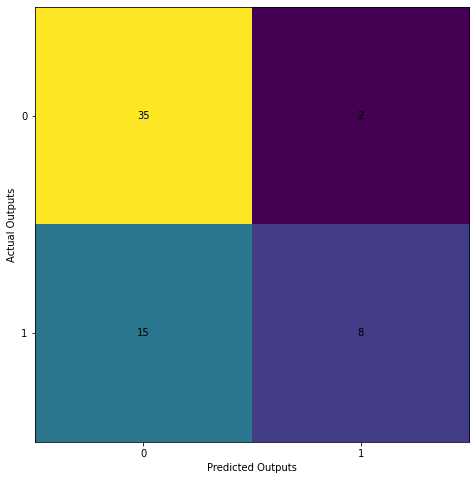

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.95      0.80        37
           1       0.80      0.35      0.48        23

    accuracy                           0.72        60
   macro avg       0.75      0.65      0.64        60
weighted avg       0.74      0.72      0.68        60

Accuracy Score:- 0.7166666666666667
Precision Score:- 0.8
Recall Score:- 0.34782608695652173


In [68]:
cm = confusion_matrix(y_test, y_pred_knn)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='black')
ax.set_ylabel('Actual Outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='black')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_knn)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_knn)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_knn)}')

- Support Vector Machine

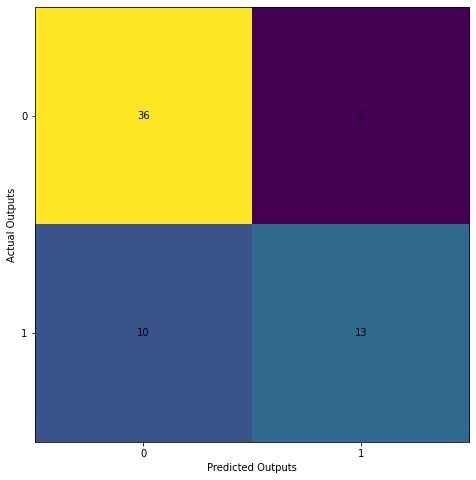

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.97      0.87        37
           1       0.93      0.57      0.70        23

    accuracy                           0.82        60
   macro avg       0.86      0.77      0.79        60
weighted avg       0.84      0.82      0.80        60

Accuracy Score:- 0.8166666666666667
Precision Score:- 0.9285714285714286
Recall Score:- 0.5652173913043478


In [69]:
cm = confusion_matrix(y_test, y_pred_svm)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='black')
ax.set_ylabel('Actual Outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='black')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_svm))
print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_svm)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_svm)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_svm)}')

- Decision Tree

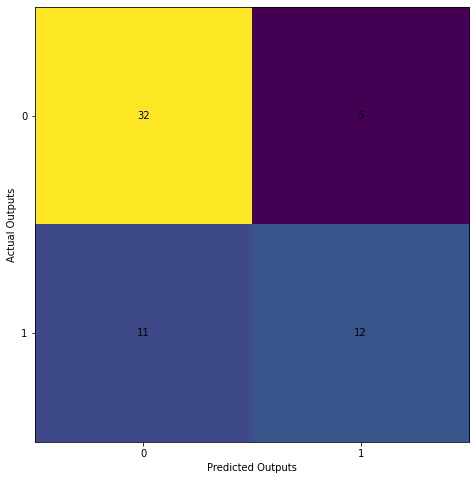

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.80        37
           1       0.71      0.52      0.60        23

    accuracy                           0.73        60
   macro avg       0.73      0.69      0.70        60
weighted avg       0.73      0.73      0.72        60

Accuracy Score:- 0.7333333333333333
Precision Score:- 0.7058823529411765
Recall Score:- 0.5217391304347826


In [70]:
cm = confusion_matrix(y_test, y_pred_dt)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='black')
ax.set_ylabel('Actual Outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='black')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_dt))
print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_dt)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_dt)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_dt)}')

- Random Forest

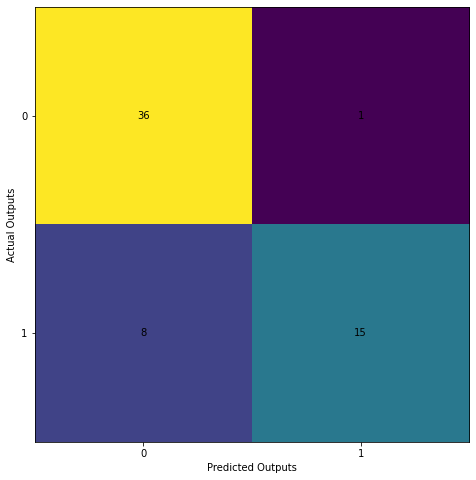

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.97      0.89        37
           1       0.94      0.65      0.77        23

    accuracy                           0.85        60
   macro avg       0.88      0.81      0.83        60
weighted avg       0.86      0.85      0.84        60

Accuracy Score:- 0.85
Precision Score:- 0.9375
Recall Score:- 0.6521739130434783


In [71]:
cm = confusion_matrix(y_test, y_pred_rf)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='black')
ax.set_ylabel('Actual Outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='black')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_rf)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_rf)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_rf)}')

- Naive Bayes

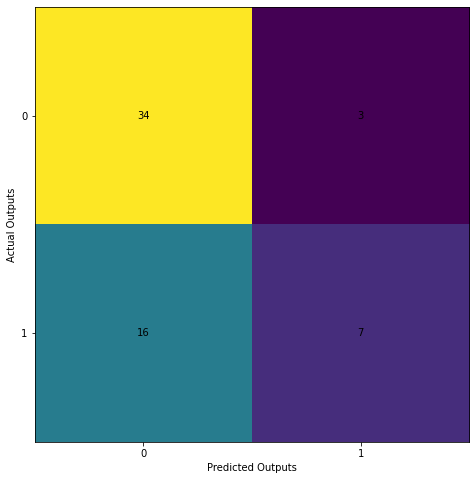

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.92      0.78        37
           1       0.70      0.30      0.42        23

    accuracy                           0.68        60
   macro avg       0.69      0.61      0.60        60
weighted avg       0.69      0.68      0.64        60

Accuracy Score:- 0.6833333333333333
Precision Score:- 0.7
Recall Score:- 0.30434782608695654


In [72]:
cm = confusion_matrix(y_test, y_pred_nb)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted Outputs', color='black')
ax.set_ylabel('Actual Outputs', color='black')
ax.xaxis.set(ticks=range(2))
ax.yaxis.set(ticks=range(2))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i,j], ha='center', va='center', color='black')
plt.show()

print("Classification Report:\n", classification_report(y_test, y_pred_nb))
print(f'Accuracy Score:- {accuracy_score(y_test, y_pred_nb)}')
print(f'Precision Score:- {precision_score(y_test,y_pred_nb)}')
print(f'Recall Score:- {recall_score(y_test,y_pred_nb)}')

Algorithm Analysis

Berdasarkan beberapa pemodelan yang dilakukan di atas, kita mendapatkan 5 akurasi model sebagai berikut:

- Logistic Regression (0.7833333333333333)
- K-Nearest Neighbors (0.7166666666666667)
- Support Vector Machine (0.8166666666666667)
- Decision Tree (0.7666666666666667)
- Random Forest (0.8333333333333333)
- Naive Bayes (0.68333333333333336)


Dari model yang telah dibuat berdasarkan macam-macam algoritma klasifikasi, bahwa algoritma klasifikasi Random Forest memiliki performa model yang paling baik diantara algoritma klasifikasi yang lain. Algoritma Random Forest memiliki nilai akurasi sebesar 83%, nilai precision sebesar 0.88, recall sebesar 0.65.

# **J. Model Inference**

# **AdaBoost**

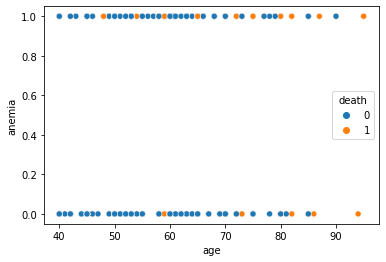

In [43]:
sns.scatterplot(x=df['age'],y=df['anemia'],hue=df['death'])

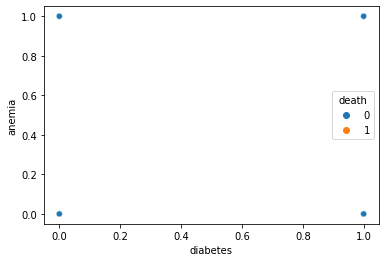

In [44]:
sns.scatterplot(x=df['diabetes'],y=df['anemia'],hue=df['death'])

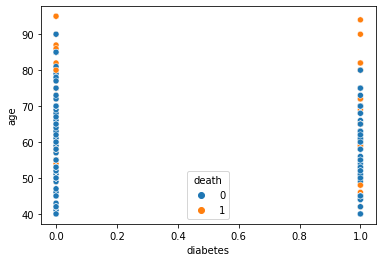

In [45]:
sns.scatterplot(x=df['diabetes'],y=df['age'],hue=df['death'])

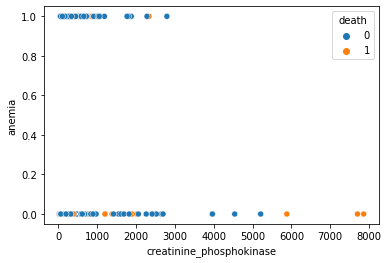

In [46]:
sns.scatterplot(x=df['creatinine_phosphokinase'],y=df['anemia'],hue=df['death'])

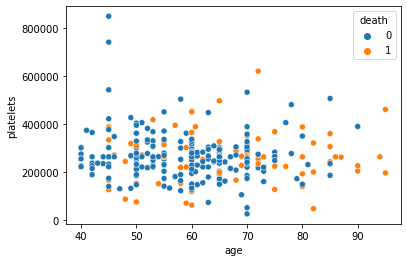

In [47]:
sns.scatterplot(x=df['age'],y=df['platelets'],hue=df['death'])

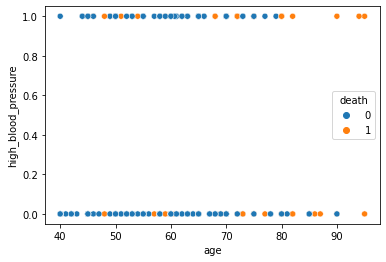

In [48]:
sns.scatterplot(x=df['age'],y=df['high_blood_pressure'],hue=df['death'])

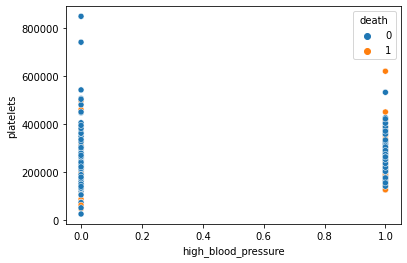

In [49]:
sns.scatterplot(x=df['high_blood_pressure'],y=df['platelets'],hue=df['death'])

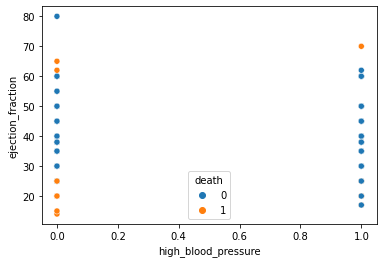

In [50]:
sns.scatterplot(x=df['high_blood_pressure'],y=df['ejection_fraction'],hue=df['death'])

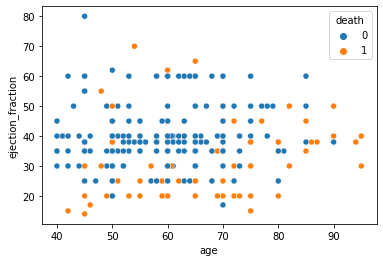

In [51]:
sns.scatterplot(x=df['age'],y=df['ejection_fraction'],hue=df['death'])

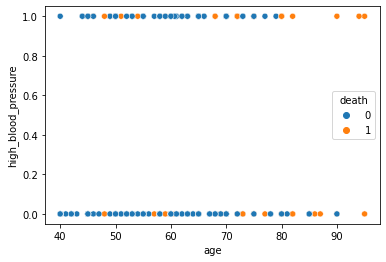

In [52]:
sns.scatterplot(x=df['age'],y=df['high_blood_pressure'],hue=df['death'])

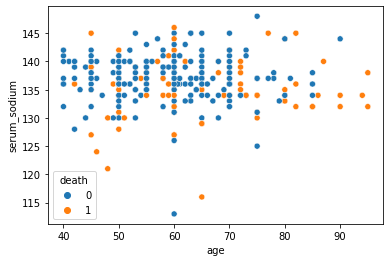

In [53]:
sns.scatterplot(x=df['age'],y=df['serum_sodium'],hue=df['death'])

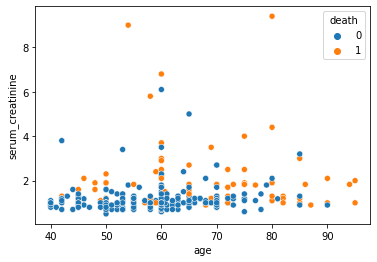

In [54]:
sns.scatterplot(x=df['age'],y=df['serum_creatinine'],hue=df['death'])

In [76]:

model_ac = AdaBoostClassifier()
model_ac.fit(X_train, y_train)
model_ac.predict(X_test)

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0])

Bagian ini diisi dengan model inference, di mana model yang sudah kita latih akan dicoba pada data selain data yang sudah tersedia. Data yang dimaksud bisa berupa data buatan oleh student, ataupun data yang ada pada internet.


In [73]:
display(df)

,age,anemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


- Skenario 1

Misal terdapat data pasien setelah dilakukan pemeriksaan, didapat hasil pemeriksaan sebagai berikut:

1. Umur : 65 Tahun
2. Tidak Memiliki Anemia
3. Creatine Phosphokinase: 150 mcg/L
4. Tidak Memiliki Diabetes
5. Ejection Fraction: 20 %
6. Tidak Memiliki Tekanan Darah Tinggi
7. Platelets: 162000 kiloplatelets/mL
8. Serum Creatinine: 1.5 mg/dL
9. Serum Sodium: 130 mEq/L
10. Laki-Laki
11. Merokok
12. Time : 8 Hari

Apakah pasien memiliki risiko kematian akibat penyakit jantung?

In [77]:
age = int(input("Age:"))
anemia = int(input("Anemia (Type 0 for No, 1 for Yes):"))
cp = float(input("Creatinine Phosphokinase Enzime Level:"))
diabet = int(input("Diabet (Type 0 for No, 1 for Yes):"))
ef = float(input("Ejection Fraction Percentage:"))
hbp = int(input("High Blood Pressure (Type 0 for No, 1 for Yes):"))
plate = float(input("Platelets Level:"))
sc = float(input("Creatinine Serum Level:"))
ss = float(input("Sodium Level:"))
sex = int(input("Sex (Type 0 for Female, 1 for Male):"))
smoke = int(input("Smoke (Type 0 for No, 1 for Yes):"))
time = int(input("Follow up control: "))

val = [age, anemia, cp, diabet, ef, hbp, plate, sc, ss, sex, smoke, time]
val = scaler.transform([val])

print('Input values:', val)

val_predict = model_rf.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:65
Anemia (Type 0 for No, 1 for Yes):0
Creatinine Phosphokinase Enzime Level:150
Diabet (Type 0 for No, 1 for Yes):0
Ejection Fraction Percentage:20
High Blood Pressure (Type 0 for No, 1 for Yes):0
Platelets Level:162000
Creatinine Serum Level:1.5
Sodium Level:130
Sex (Type 0 for Female, 1 for Male):1
Smoke (Type 0 for No, 1 for Yes):1
Follow up control: 8
Input values: [[ 0.35083298 -0.87110478 -0.44580936 -0.84757938 -1.53055953 -0.73568819
  -1.03807313  0.10275232 -1.50403612  0.73568819  1.4541607  -1.57787906]]

Pasien memiliki risiko kematian akibat penyakit jantung


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



- Skenario 2

Misal terdapat data pasien setelah dilakukan pemeriksaan, didapat hasil pemeriksaan sebagai berikut:

1. Umur : 45 Tahun
2. Tidak Memiliki Anemia
3. Creatine Phosphokinase: 2000 mcg/L
4. Memiliki Diabetes
5. Ejection Fraction: 70 %
6. Tidak Memiliki Tekanan Darah Tinggi
7. Platelets: 700000 kiloplatelets/mL
8. Serum Creatinine: 1.0 mg/dL
9. Serum Sodium: 140 mEq/L
10. Perempuan
11. Tidak Merokok
12. Time : 150 Hari

Apakah pasien memiliki risiko kematian akibat penyakit jantung?

In [78]:
age = int(input("Age:"))
anemia = int(input("Anemia (Type 0 for No, 1 for Yes):"))
cp = float(input("Creatinine Phosphokinase Enzime Level:"))
diabet = int(input("Diabet (Type 0 for No, 1 for Yes):"))
ef = float(input("Ejection Fraction Percentage:"))
hbp = int(input("High Blood Pressure (Type 0 for No, 1 for Yes):"))
plate = float(input("Platelets Level:"))
sc = float(input("Creatinine Serum Level:"))
ss = float(input("Sodium Level:"))
sex = int(input("Sex (Type 0 for Female, 1 for Male):"))
smoke = int(input("Smoke (Type 0 for No, 1 for Yes):"))
time = int(input("Follow up control: "))

val = [age, anemia, cp, diabet, ef, hbp, plate, sc, ss, sex, smoke, time]
val = scaler.transform([val])

print('Input values:', val)

val_predict = model_rf.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:45
Anemia (Type 0 for No, 1 for Yes):0
Creatinine Phosphokinase Enzime Level:2000
Diabet (Type 0 for No, 1 for Yes):1
Ejection Fraction Percentage:70
High Blood Pressure (Type 0 for No, 1 for Yes):0
Platelets Level:700000
Creatinine Serum Level:1
Sodium Level:140
Sex (Type 0 for Female, 1 for Male):0
Smoke (Type 0 for No, 1 for Yes):0
Follow up control: 150
Input values: [[-1.33339153 -0.87110478  1.46403767  1.1798305   2.70133708 -0.73568819
   4.47193283 -0.38137852  0.76606383 -1.35927151 -0.68768191  0.25475003]]

Pasien tidak memiliki risiko kematian akibat penyakit jantung


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



# **Voting Classifier**

- Logistic Regression

In [79]:
age = int(input("Age:"))
anemia = int(input("Anemia (Type 0 for No, 1 for Yes):"))
cp = float(input("Creatinine Phosphokinase Enzime Level:"))
diabet = int(input("Diabet (Type 0 for No, 1 for Yes):"))
ef = float(input("Ejection Fraction Percentage:"))
hbp = int(input("High Blood Pressure (Type 0 for No, 1 for Yes):"))
plate = float(input("Platelets Level:"))
sc = float(input("Creatinine Serum Level:"))
ss = float(input("Sodium Level:"))
sex = int(input("Sex (Type 0 for Female, 1 for Male):"))
smoke = int(input("Smoke (Type 0 for No, 1 for Yes):"))
time = int(input("Follow up control: "))

val = [age, anemia, cp, diabet, ef, hbp, plate, sc, ss, sex, smoke, time]
val = scaler.transform([val])

print('Input values:', val)

val_predict = model_lr.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:45
Anemia (Type 0 for No, 1 for Yes):0
Creatinine Phosphokinase Enzime Level:2000
Diabet (Type 0 for No, 1 for Yes):0
Ejection Fraction Percentage:70
High Blood Pressure (Type 0 for No, 1 for Yes):0
Platelets Level:162000
Creatinine Serum Level:1.5
Sodium Level:130
Sex (Type 0 for Female, 1 for Male):1
Smoke (Type 0 for No, 1 for Yes):1
Follow up control: 8
Input values: [[-1.33339153 -0.87110478  1.46403767 -0.84757938  2.70133708 -0.73568819
  -1.03807313  0.10275232 -1.50403612  0.73568819  1.4541607  -1.57787906]]

Pasien tidak memiliki risiko kematian akibat penyakit jantung


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LogisticRegression was fitted with feature names



- K-Nearest Neighbors

In [80]:
age = int(input("Age:"))
anemia = int(input("Anemia (Type 0 for No, 1 for Yes):"))
cp = float(input("Creatinine Phosphokinase Enzime Level:"))
diabet = int(input("Diabet (Type 0 for No, 1 for Yes):"))
ef = float(input("Ejection Fraction Percentage:"))
hbp = int(input("High Blood Pressure (Type 0 for No, 1 for Yes):"))
plate = float(input("Platelets Level:"))
sc = float(input("Creatinine Serum Level:"))
ss = float(input("Sodium Level:"))
sex = int(input("Sex (Type 0 for Female, 1 for Male):"))
smoke = int(input("Smoke (Type 0 for No, 1 for Yes):"))
time = int(input("Follow up control: "))

val = [age, anemia, cp, diabet, ef, hbp, plate, sc, ss, sex, smoke, time]
val = scaler.transform([val])

print('Input values:', val)

val_predict = model_knn.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:45
Anemia (Type 0 for No, 1 for Yes):0
Creatinine Phosphokinase Enzime Level:2000
Diabet (Type 0 for No, 1 for Yes):0
Ejection Fraction Percentage:70
High Blood Pressure (Type 0 for No, 1 for Yes):0
Platelets Level:162000
Creatinine Serum Level:1.5
Sodium Level:130
Sex (Type 0 for Female, 1 for Male):0
Smoke (Type 0 for No, 1 for Yes):1
Follow up control: 8
Input values: [[-1.33339153 -0.87110478  1.46403767 -0.84757938  2.70133708 -0.73568819
  -1.03807313  0.10275232 -1.50403612 -1.35927151  1.4541607  -1.57787906]]

Pasien tidak memiliki risiko kematian akibat penyakit jantung


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but KNeighborsClassifier was fitted with feature names



- Support Vector Machine

In [82]:
age = int(input("Age:"))
anemia = int(input("Anemia (Type 0 for No, 1 for Yes):"))
cp = float(input("Creatinine Phosphokinase Enzime Level:"))
diabet = int(input("Diabet (Type 0 for No, 1 for Yes):"))
ef = float(input("Ejection Fraction Percentage:"))
hbp = int(input("High Blood Pressure (Type 0 for No, 1 for Yes):"))
plate = float(input("Platelets Level:"))
sc = float(input("Creatinine Serum Level:"))
ss = float(input("Sodium Level:"))
sex = int(input("Sex (Type 0 for Female, 1 for Male):"))
smoke = int(input("Smoke (Type 0 for No, 1 for Yes):"))
time = int(input("Follow up control: "))

val = [age, anemia, cp, diabet, ef, hbp, plate, sc, ss, sex, smoke, time]
val = scaler.transform([val])

print('Input values:', val)

val_predict = model_svm.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:45
Anemia (Type 0 for No, 1 for Yes):0
Creatinine Phosphokinase Enzime Level:2000
Diabet (Type 0 for No, 1 for Yes):0
Ejection Fraction Percentage:70
High Blood Pressure (Type 0 for No, 1 for Yes):0
Platelets Level:152000
Creatinine Serum Level:1.5
Sodium Level:130
Sex (Type 0 for Female, 1 for Male):0
Smoke (Type 0 for No, 1 for Yes):1
Follow up control: 8
Input values: [[-1.33339153 -0.87110478  1.46403767 -0.84757938  2.70133708 -0.73568819
  -1.1404896   0.10275232 -1.50403612 -1.35927151  1.4541607  -1.57787906]]

Pasien memiliki risiko kematian akibat penyakit jantung


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



- Decision Tree

In [83]:
age = int(input("Age:"))
anemia = int(input("Anemia (Type 0 for No, 1 for Yes):"))
cp = float(input("Creatinine Phosphokinase Enzime Level:"))
diabet = int(input("Diabet (Type 0 for No, 1 for Yes):"))
ef = float(input("Ejection Fraction Percentage:"))
hbp = int(input("High Blood Pressure (Type 0 for No, 1 for Yes):"))
plate = float(input("Platelets Level:"))
sc = float(input("Creatinine Serum Level:"))
ss = float(input("Sodium Level:"))
sex = int(input("Sex (Type 0 for Female, 1 for Male):"))
smoke = int(input("Smoke (Type 0 for No, 1 for Yes):"))
time = int(input("Follow up control: "))

val = [age, anemia, cp, diabet, ef, hbp, plate, sc, ss, sex, smoke, time]
val = scaler.transform([val])

print('Input values:', val)

val_predict = model_dt.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:45
Anemia (Type 0 for No, 1 for Yes):0
Creatinine Phosphokinase Enzime Level:2000
Diabet (Type 0 for No, 1 for Yes):0
Ejection Fraction Percentage:70
High Blood Pressure (Type 0 for No, 1 for Yes):0
Platelets Level:162000
Creatinine Serum Level:1.5
Sodium Level:130
Sex (Type 0 for Female, 1 for Male):0
Smoke (Type 0 for No, 1 for Yes):1
Follow up control: 8
Input values: [[-1.33339153 -0.87110478  1.46403767 -0.84757938  2.70133708 -0.73568819
  -1.03807313  0.10275232 -1.50403612 -1.35927151  1.4541607  -1.57787906]]

Pasien tidak memiliki risiko kematian akibat penyakit jantung


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



- Naive Bayes

In [84]:
age = int(input("Age:"))
anemia = int(input("Anemia (Type 0 for No, 1 for Yes):"))
cp = float(input("Creatinine Phosphokinase Enzime Level:"))
diabet = int(input("Diabet (Type 0 for No, 1 for Yes):"))
ef = float(input("Ejection Fraction Percentage:"))
hbp = int(input("High Blood Pressure (Type 0 for No, 1 for Yes):"))
plate = float(input("Platelets Level:"))
sc = float(input("Creatinine Serum Level:"))
ss = float(input("Sodium Level:"))
sex = int(input("Sex (Type 0 for Female, 1 for Male):"))
smoke = int(input("Smoke (Type 0 for No, 1 for Yes):"))
time = int(input("Follow up control: "))

val = [age, anemia, cp, diabet, ef, hbp, plate, sc, ss, sex, smoke, time]
val = scaler.transform([val])

print('Input values:', val)

val_predict = model_nb.predict(val)

if val_predict == 1:
    print('\nPasien memiliki risiko kematian akibat penyakit jantung')
else:
    print('\nPasien tidak memiliki risiko kematian akibat penyakit jantung')

Age:45
Anemia (Type 0 for No, 1 for Yes):0
Creatinine Phosphokinase Enzime Level:2000
Diabet (Type 0 for No, 1 for Yes):0
Ejection Fraction Percentage:70
High Blood Pressure (Type 0 for No, 1 for Yes):0
Platelets Level:162000
Creatinine Serum Level:1.5
Sodium Level:130
Sex (Type 0 for Female, 1 for Male):0
Smoke (Type 0 for No, 1 for Yes):1
Follow up control: 8
Input values: [[-1.33339153 -0.87110478  1.46403767 -0.84757938  2.70133708 -0.73568819
  -1.03807313  0.10275232 -1.50403612 -1.35927151  1.4541607  -1.57787906]]

Pasien tidak memiliki risiko kematian akibat penyakit jantung


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but GaussianNB was fitted with feature names



# **K.Pengambilan Kesimpulan**

Pada bab terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan dibandingkan dengan objective yang sudah ditulis di bagian pengenalan

- Project ini mencakup penerapan teknik supervised learning machine learning, yaitu klasifikasi. Data yang digunakan adalah kumpulan data yang mendokumentasikan kondisi pasien dengan penyakit kardiovaskular. Dataset terdiri dari 299 baris dan 13 kolom. Kolom DEATH_EVENT akan menjadi target prediksi ini. Oleh karena itu, tujuan dari proyek ini adalah untuk memprediksi apakah pasien memiliki risiko kematian akibat gagal jantung/penyakit kardiovaskular berdasarkan kolom atau fitur yang terdapat dalam data.

- Variabel yang diketahui memiliki dampak terbesar dalam memprediksi risiko kematian akibat penyakit jantung adalah: time, ejection_fraction, serum_creatinine, age, creatinine_phosphokinase, platelets, dan serum_sodium. Dalam hal ini, frekuensi tindak lanjut pasien untuk mengelola kondisinya bisa sangat berpengaruh dalam menentukan apakah ada risiko kematian akibat penyakit jantung.

- Pasien dengan umur di atas 50 tahun memiliki risiko kematian akibat penyakit jantung yang lebih tinggi.

- Algoritma model klasifikasi yang digunakan adalah regresi logistik, K-Nearest Neighbors, Support Vector Machines (SVM), Decision Trees, dan Naive Bayes. Berdasarkan pelatihan model yang telah dilakukan, didapatkan model random forest sebagai model dengan performansi terbaik, dengan akurasi akhir 88%, presisi 0,94, recall 0,74, dan f1-score 0,83.
